In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

C:\Users\Bhaskar22\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_csv("C:/Users/Bhaskar22/Desktop/MINIPROJECT/data/Mobile_churn_UCI_Cleaned.csv")
data.head()


,Unnamed: 0,ACCT_LEN,INTL_PLN,VM_PLN,VM_CNT,DAY_MINS,DAY_CALLS,EVE_MINS,EVE_CALLS,NITE_MINS,NITE_CALLS,INTL_MINS,INTL_CALLS,CSRV_CALLS,CHURN
0,0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [3]:
counts = data.describe().iloc[0]
pd.DataFrame(counts.tolist(),columns=["Count of Values"],index=counts.index.values)


,Count of Values
Unnamed: 0,3333.0
ACCT_LEN,3333.0
INTL_PLN,3333.0
VM_PLN,3333.0
VM_CNT,3333.0
DAY_MINS,3333.0
DAY_CALLS,3333.0
EVE_MINS,3333.0
EVE_CALLS,3333.0
NITE_MINS,3333.0


In [4]:
print("Number of rows:",data.shape[0])

Number of rows: 3333


In [5]:
data.describe()

,Unnamed: 0,ACCT_LEN,INTL_PLN,VM_PLN,VM_CNT,DAY_MINS,DAY_CALLS,EVE_MINS,EVE_CALLS,NITE_MINS,NITE_CALLS,INTL_MINS,INTL_CALLS,CSRV_CALLS,CHURN
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.144914
std,962.29855,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.352067
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,833.00000,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,1666.00000,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,2499.00000,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000
max,3332.00000,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


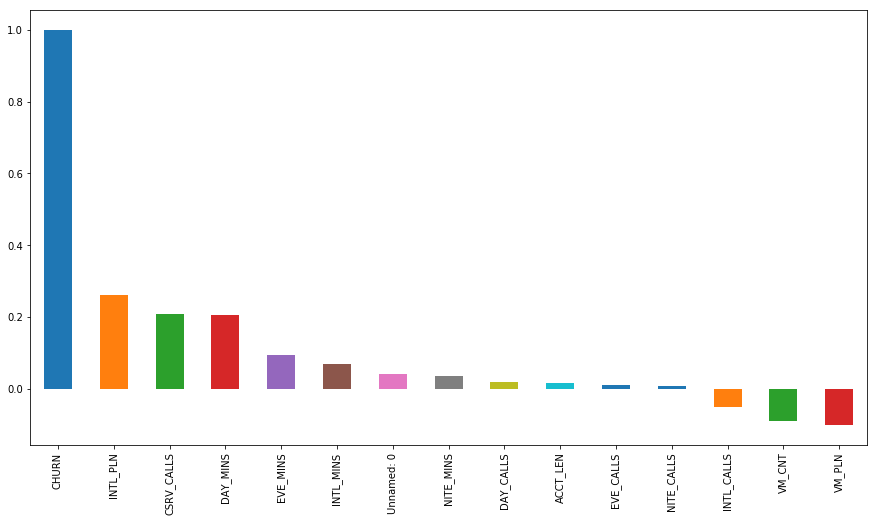

In [6]:
plt.figure(figsize=(15,8))
data.corr()['CHURN'].sort_values(ascending = False).plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258C59CE320>,
      dtype=object)

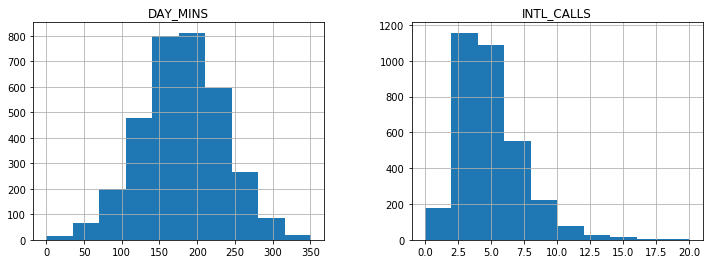

In [7]:
features=["DAY_MINS","INTL_CALLS"]
data[features].hist(figsize=(12,4))

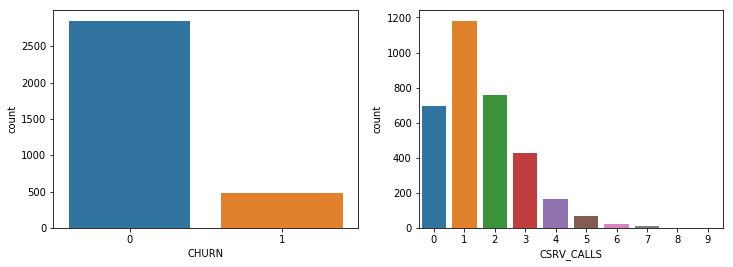

In [8]:
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x="CHURN",data=data,ax=axes[0])
sns.countplot(x="CSRV_CALLS",data=data,ax=axes[1])



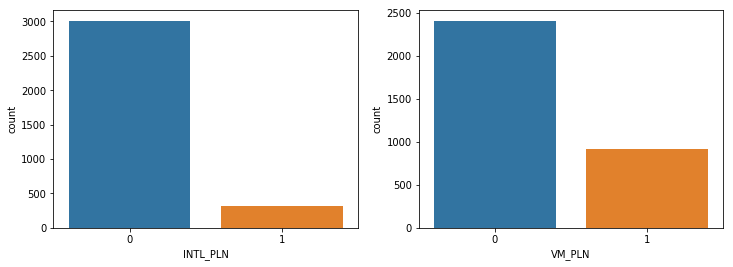

In [9]:
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x="INTL_PLN",data=data,ax=axes[0])
sns.countplot(x="VM_PLN",data=data,ax=axes[1])

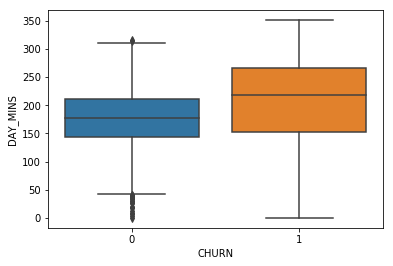

In [10]:
ax=sns.boxplot(x="CHURN", y="DAY_MINS",data=data)

# CHURN VS DAY_MINS
1>Symmetric for nonchurn 

2>Skewed for churn

3>outliers(unusual observation) for nonchurn

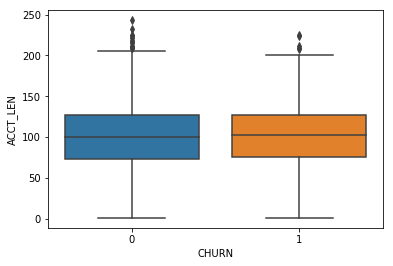

In [11]:
ax=sns.boxplot(x="CHURN", y="ACCT_LEN",data=data)

# CHURN VS ACCT_LEN
1>Both churn and nonchurn both are symmetric.


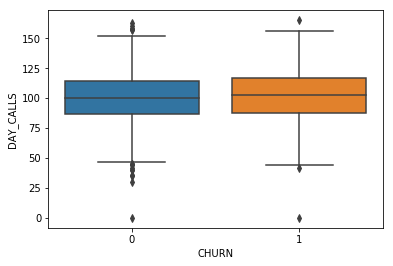

In [12]:
ax=sns.boxplot(x="CHURN", y="DAY_CALLS",data=data)

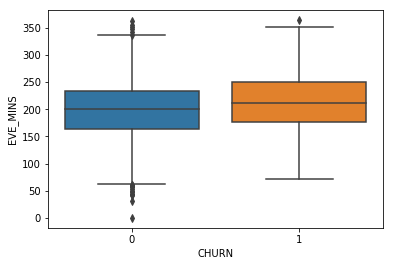

In [13]:
ax=sns.boxplot(x="CHURN", y="EVE_MINS",data=data)

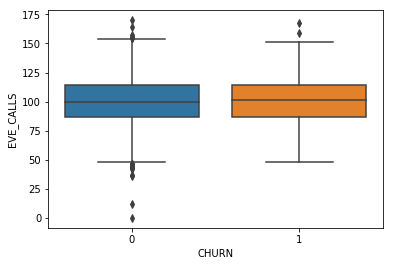

In [14]:
ax=sns.boxplot(x="CHURN", y="EVE_CALLS",data=data)

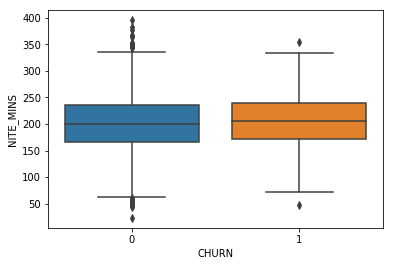

In [15]:
ax=sns.boxplot(x="CHURN", y="NITE_MINS",data=data)

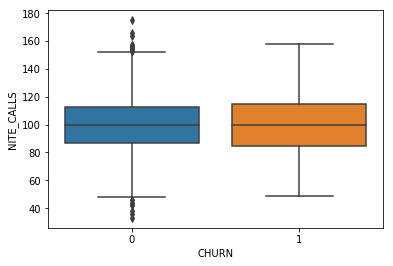

In [16]:
ax=sns.boxplot(x="CHURN", y="NITE_CALLS",data=data)

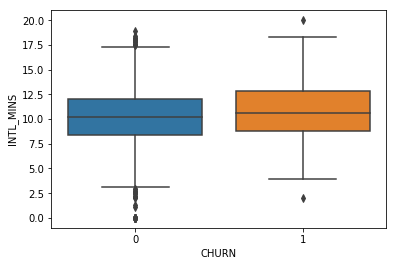

In [17]:
ax=sns.boxplot(x="CHURN", y="INTL_MINS",data=data)

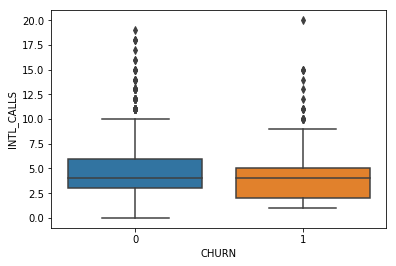

In [18]:
ax=sns.boxplot(x="CHURN", y="INTL_CALLS",data=data)

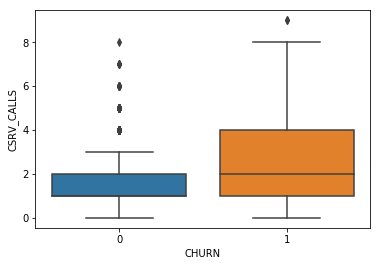

In [19]:
ax=sns.boxplot(x="CHURN", y="CSRV_CALLS",data=data)

# CHURN VS CSRV_CALLS
1>In nonchurn outlier shows unusual observation

In [20]:
data = data.drop(["Unnamed: 0"],axis=1)
features = data.drop(["CHURN"],axis=1).columns
print(features)

Index(['ACCT_LEN', 'INTL_PLN', 'VM_PLN', 'VM_CNT', 'DAY_MINS', 'DAY_CALLS',
       'EVE_MINS', 'EVE_CALLS', 'NITE_MINS', 'NITE_CALLS', 'INTL_MINS',
       'INTL_CALLS', 'CSRV_CALLS'],
      dtype='object')


In [21]:
data.dtypes

ACCT_LEN        int64
INTL_PLN        int64
VM_PLN          int64
VM_CNT          int64
DAY_MINS      float64
DAY_CALLS       int64
EVE_MINS      float64
EVE_CALLS       int64
NITE_MINS     float64
NITE_CALLS      int64
INTL_MINS     float64
INTL_CALLS      int64
CSRV_CALLS      int64
CHURN           int64
dtype: object

In [22]:
# Splitting Data into Training and test data.
data_train,data_test = train_test_split(data,test_size=0.25)

In [23]:
# Use RandomForest,fit and score the model.
Accuracy_score = []
for i in range(1,100):    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(data_train[features],data_train["CHURN"])
    pred_clf = clf.predict(data_test[features])
    probs = clf.predict_proba(data_test[features])
    score = clf.score(data_test[features], data_test["CHURN"])
    Accuracy_score.append(clf.score(data_test[features], data_test["CHURN"]))


In [24]:
print("Accuracy_score:",max(Accuracy_score)*100)

Accuracy_score: 95.08393285371703


In [25]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(data_test["CHURN"],pred_clf),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,694,2
Actual True,45,93


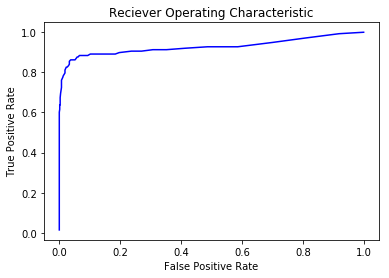

In [26]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(data_test["CHURN"],probs[:,1])
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
# Use Logistic Regression, fit and score model.
lr = LogisticRegression(penalty='l1')
lr.fit(data_train[features],data_train["CHURN"])
lr_predict = lr.predict(data_test[features])

In [28]:
accuracy_score = lr.score(data_test[features],data_test["CHURN"])
print("Accuracy : ", accuracy_score*100)

Accuracy :  85.13189448441247


In [29]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(data_test["CHURN"],lr_predict),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])


,Predicted False,Predicted True
Actual False,679,17
Actual True,107,31


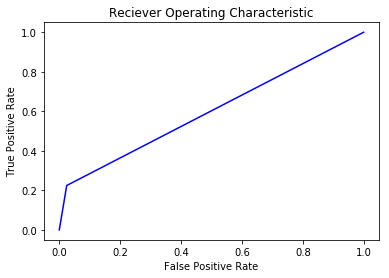

In [30]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(data_test["CHURN"],lr_predict)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
# Find out importance of each feature on predicting variable(churn).
data_f = pd.DataFrame(clf.feature_importances_, columns = ['importance'])
data_f['labels'] = features
data_f.sort_values('importance',ascending=False)

,importance,labels
4,0.262318,DAY_MINS
12,0.109647,CSRV_CALLS
6,0.102936,EVE_MINS
10,0.077604,INTL_MINS
1,0.069987,INTL_PLN
8,0.064889,NITE_MINS
11,0.059887,INTL_CALLS
5,0.055807,DAY_CALLS
0,0.051242,ACCT_LEN
9,0.050282,NITE_CALLS


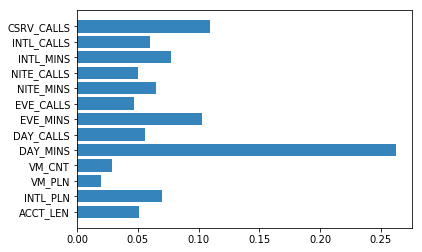

In [48]:
y_pos = np.arange(len(data_f['labels']))
y = data_f['importance'].tolist()
x = data_f['labels'].tolist()
plt.barh(y_pos,y,align='center',alpha=0.9)
plt.yticks(y_pos,x)
plt.show()

# Conclusion:
From the visualization we can draw conclusion that top 5 features influences the churn predictions are

1] Day Mins: Extending the number of minutes that a customer can use without any extra charge may keep them happy.

2] Customer Service: Addressing each and every customer issues with highest priority may help to keep the customer happy.

3] Evening Mins: Adding more evening minutes may help customer to stick to current survice provider.

4] International Plan: Customers have friends and family in other nations, that is how they connect to them, so offering more international minutes at competitive rate may keep customers happy.

5] International Minutes: Inorder to keep customers, offering a International Minutes higher then others and charge relatively lower than other competitors may keep customer happy and lead to retention.

6] Random Forrest classifier gives better accuracy and less erroneous results as compared to other classifiers. 

